In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.feature_selection import RFE, RFECV

In [6]:
from sklearn.cluster import KMeans

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
import scipy.cluster.hierarchy as sch

In [9]:
from sklearn.decomposition import PCA

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, \
f1_score

In [66]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
pd.set_option('max_rows',100)

In [12]:
pd.set_option('max_columns',100)

### 1.Data Ingestion:

In [14]:
df_shop = pd.read_csv('online_shoppers_intention_given.csv')

In [15]:
df_shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
df_shop.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [17]:
df_shop.shape

(12330, 18)

In [18]:
df_shop.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [19]:
df_shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [20]:
df_shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Inference

1. No null values
2. Administrive feature is right skewed

### 2.  Kmeans:

In [22]:
df_shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [23]:
df_shop['Weekend'] = df_shop['Weekend'].map({True:1, False:0})

In [24]:
df_shop['Revenue'] = df_shop['Revenue'].map({True:1, False:0})

In [25]:
df_shop['OperatingSystems'] = df_shop['OperatingSystems'].astype('category')

In [26]:
df_shop['Region'] = df_shop['Region'].astype('category')

In [27]:
df_shop['TrafficType'] = df_shop['TrafficType'].astype('category')

In [28]:
numeric_Features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [29]:
categorical_features = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',\
       'Weekend', 'Revenue']

In [30]:
df_shop_numeric = df_shop[numeric_Features]

In [31]:
df_shop_categorical = df_shop[categorical_features]

In [32]:
sc = StandardScaler()

In [33]:
df_shop_numeric_scaled = sc.fit_transform(df_shop_numeric)

In [34]:
df_shop_scaled = pd.DataFrame(df_shop_numeric_scaled, columns=numeric_Features)

In [35]:
df_shop_categorical_dummies = pd.get_dummies(data=df_shop_categorical, drop_first=True )

In [36]:
df_shop_new = pd.concat([df_shop_scaled,df_shop_categorical_dummies ], axis = 1 )

In [37]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=300).fit(df_shop_new) 
    inertia.append(np.sqrt(kmeans.inertia_))

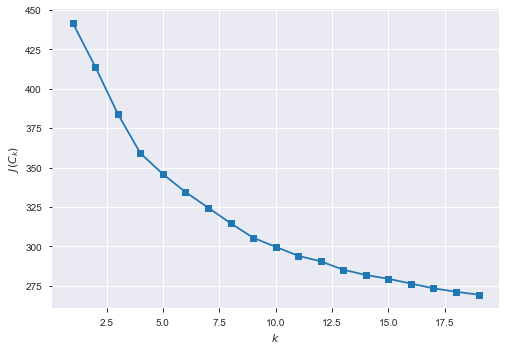

In [38]:
plt.plot(range(1, 20), inertia, marker='s'); 
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=1)
y_predict_kmeans = kmeans.fit_predict(df_shop_new)

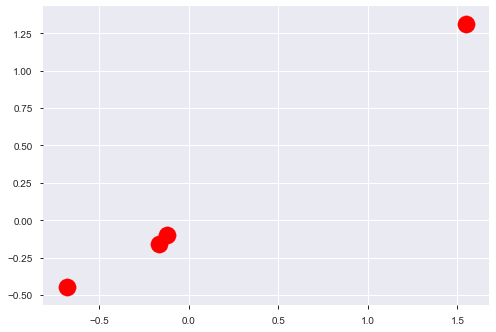

In [40]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Inference

4 numbers of optimum clusters were found from kmeans.

### 3.  Hierarchical:

CPU times: user 16.2 s, sys: 488 ms, total: 16.7 s
Wall time: 16.7 s


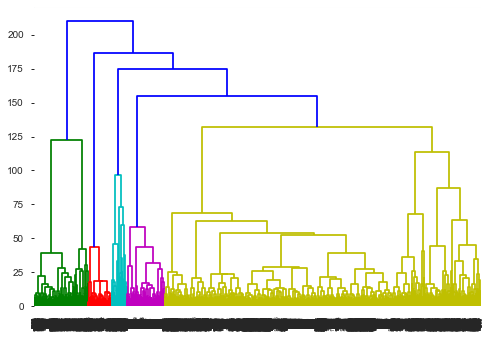

In [41]:
%%time
dendrogram = sch.dendrogram(sch.linkage(df_shop_new, method='ward'))

In [42]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [43]:
ac.fit(df_shop_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [44]:
labels = ac.labels_

### Inference

The highest vertical distance that doesn’t intersect with any clusters is the green one. Given that 2 vertical lines cross the threshold, the optimal number of clusters is 2

### 4. Convert Unsupervised data into Supervised data:

In [90]:
df_shop_new['kmeans_output'] = y_predict_kmeans

In [46]:
df_shop_new

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,kmeans_output
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2


In [47]:
df_shop_new['kmeans_output'].unique()

array([1, 2, 3, 0])

In [91]:
df_shop_new.drop(columns = ['Revenue'], axis = 1, inplace = True)

### Inference

1. Added target feature as number of clusters from kmeans model.
2. Removed Revenue feature 

### 5. PCA :

In [48]:
#df_shop_new.drop(columns = ['kmeans_output'], axis = 1)

In [49]:
pca = PCA(n_components=5)

In [50]:
principal_components = pca.fit_transform(df_shop_new)

In [51]:
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [52]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.101681,-1.928636,3.490991,-1.117818,-0.871132
1,-1.310496,-0.469448,-0.147029,-0.218794,0.180179
2,-3.128704,-1.930435,3.504334,-1.100502,-0.884776
3,-1.964550,-0.685262,1.035585,-0.493447,-0.112202
4,-1.088117,0.468072,-0.242843,-0.049147,0.119983


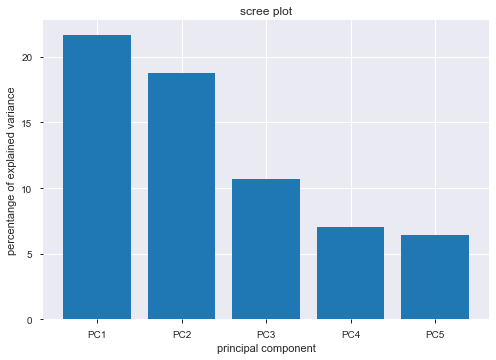

In [53]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

### Kmeans Clustering

In [54]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=300).fit(df_pca) 
    inertia.append(np.sqrt(kmeans.inertia_))

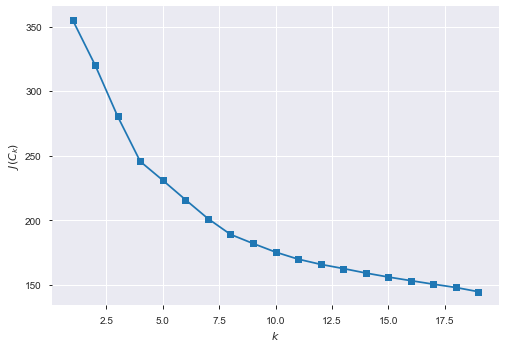

In [55]:
plt.plot(range(1, 20), inertia, marker='s'); 
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [56]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=1)
y_predict_kmeans = kmeans.fit_predict(df_pca)

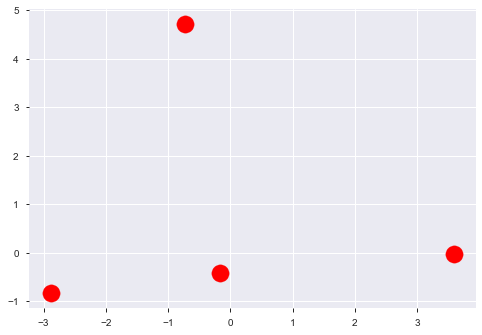

In [57]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Hierarchical clustering

CPU times: user 14.4 s, sys: 465 ms, total: 14.9 s
Wall time: 14.8 s


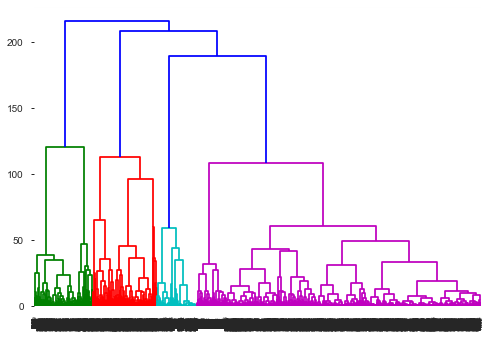

In [58]:
%%time
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [59]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [60]:
ac.fit(df_shop_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [61]:
labels = ac.labels_

### Inference

1. After applying PCA the centroids of the clusters shifted.
2. The highest vertical distance that doesn’t intersect with any clusters is the red one. Given that 2 vertical lines cross the threshold, the optimal number of clusters is 2.

### 6.  Data Split:

In [122]:
X = df_shop_new.drop(columns = ['kmeans_output'], axis = 1)

In [123]:
y = df_shop_new['kmeans_output']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [125]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test)
f1_score_logistic_regression = f1_score(y_predict_logistic_regression, y_test, average='micro')
accuracy_score_logistic_regression = accuracy_score(y_predict_logistic_regression, y_test)
print('F1-score is -- ', f1_score_logistic_regression)
print('Accuracy is -- ', accuracy_score_logistic_regression)

F1-score is --  0.9829683698296837
Accuracy is --  0.9829683698296837


In [126]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
f1_score_logistic_knn = f1_score(y_predict_knn, y_test, average='micro')
accuracy_score_knn = accuracy_score(y_predict_knn, y_test)
print('F1-score is -- ', f1_score_logistic_knn)
print('Accuracy is -- ', accuracy_score_knn)

F1-score is --  0.9672884563395512
Accuracy is --  0.9672884563395512


In [127]:
navie_bayes = GaussianNB()
navie_bayes.fit(X_train, y_train)
y_predict_navie_bayes = navie_bayes.predict(X_test)
f1_score_navie_bayes = f1_score(y_predict_navie_bayes, y_test, average='micro')
accuracy_score_navie_bayes = accuracy_score(y_predict_navie_bayes, y_test)
print('F1-score is -- ', f1_score_navie_bayes)
print('Accuracy is -- ', accuracy_score_navie_bayes)

F1-score is --  0.2516896458502298
Accuracy is --  0.2516896458502298


In [128]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predict_decision_tree = decision_tree.predict(X_test)
f1_score_decision_tree = f1_score(y_predict_decision_tree, y_test, average='micro')
accuracy_score_decision_tree = accuracy_score(y_predict_decision_tree, y_test)
print('F1-score is -- ', f1_score_decision_tree)
print('Accuracy is -- ', accuracy_score_decision_tree)

F1-score is --  0.9713436063801028
Accuracy is --  0.9713436063801028


In [129]:
results_without_pca = pd.DataFrame({'Model Name':['Logistic Regression', 'KNN', 'Decision Tree', 'Navie Bayes'],\
              'F1-score':[f1_score_logistic_regression, f1_score_decision_tree, f1_score_logistic_knn, \
                          f1_score_navie_bayes],\
              'Accuracy score':[accuracy_score_logistic_regression, accuracy_score_decision_tree,\
                               accuracy_score_knn, accuracy_score_navie_bayes]})

### Inference

1. Logistic Regression is performing the best
2. Navie Bayes is perfoeming the worst

### 7. Split train and test after PCA

In [109]:
pca = PCA(n_components=5)

In [110]:
X_train_pca = pca.fit_transform(X_train)

In [111]:
X_test_pca = pca.transform(X_test)

In [112]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test_pca)
f1_score_logistic_regression = f1_score(y_predict_logistic_regression, y_test, average='micro')
accuracy_score_logistic_regression = accuracy_score(y_predict_logistic_regression, y_test)
print('F1-score is -- ', f1_score_logistic_regression)
print('Accuracy is -- ', accuracy_score_logistic_regression)

F1-score is --  0.9835090565017572
Accuracy is --  0.9835090565017572


In [113]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_predict_knn = knn.predict(X_test_pca)
f1_score_logistic_knn = f1_score(y_predict_knn, y_test, average='micro')
accuracy_score_knn = accuracy_score(y_predict_knn, y_test)
print('F1-score is -- ', f1_score_logistic_knn)
print('Accuracy is -- ', accuracy_score_knn)

F1-score is --  0.9894566098945661
Accuracy is --  0.9894566098945661


In [114]:
navie_bayes = GaussianNB()
navie_bayes.fit(X_train_pca, y_train)
y_predict_navie_bayes = navie_bayes.predict(X_test_pca)
f1_score_navie_bayes = f1_score(y_predict_navie_bayes, y_test, average='micro')
accuracy_score_navie_bayes = accuracy_score(y_predict_navie_bayes, y_test)
print('F1-score is -- ', f1_score_navie_bayes)
print('Accuracy is -- ', accuracy_score_navie_bayes)

F1-score is --  0.9608002162746688
Accuracy is --  0.9608002162746688


In [115]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca, y_train)
y_predict_decision_tree = decision_tree.predict(X_test_pca)
f1_score_decision_tree = f1_score(y_predict_decision_tree, y_test, average='micro')
accuracy_score_decision_tree = accuracy_score(y_predict_decision_tree, y_test)
print('F1-score is -- ', f1_score_decision_tree)
print('Accuracy is -- ', accuracy_score_decision_tree)

F1-score is --  0.9908083265747499
Accuracy is --  0.9908083265747499


In [ ]:
results_pca = pd.DataFrame({'Model Name':['Logistic Regression', 'KNN', 'Decision Tree', 'Navie Bayes'],\
              'F1-score':[f1_score_logistic_regression, f1_score_decision_tree, f1_score_logistic_knn, \
                          f1_score_navie_bayes],\
              'Accuracy score':[accuracy_score_logistic_regression, accuracy_score_decision_tree,\
                               accuracy_score_knn, accuracy_score_navie_bayes]})

### Inference

After PCA all model are performing at same level so, would go with Logistic Regression

### 8.  Final Model:

### Before PCA

In [130]:
results_without_pca

,Model Name,F1-score,Accuracy score
0,Logistic Regression,0.982968,0.982968
1,KNN,0.971344,0.971344
2,Decision Tree,0.967288,0.967288
3,Navie Bayes,0.251690,0.251690


### After PCA

In [121]:
results_pca

,Model Name,F1-score,Accuracy score
0,Logistic Regression,0.983509,0.983509
1,KNN,0.990808,0.990808
2,Decision Tree,0.989457,0.989457
3,Navie Bayes,0.251690,0.251690


### Inference

After applying PCA and before PCA all the models are performing the same so would go with Logistic Regresion before PCA.